In [1]:
# So we are just importing our data, it should have worked fine from the website, 
# but it was freaking out and i just download the data and have it locally but nothing else changes
import pandas as pd

data = pd.read_csv('Malware-staDyn-data.csv')

# just so we can see some of the data 
print(data.shape[0])
data.head()

# data = pd.read_csv('C:/Users/micha/math4ds/StarWarsClean.csv')
# 

6248


,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,count_file_written,count_file_exists,count_file_deleted,count_file_copied,count_file_renamed,count_regkey_written,count_regkey_deleted,count_file_opened,count_dll_loaded,label
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# played around with switching 0 and 1s seems fine 
# data['label'] = data['label'].map({1:0, 0:1})
# data.head()

In [3]:
# yup  what we wanted to see
data['label'].value_counts()

1    5653
0     595
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x18a507d4370>,
 [Text(-1.051137863151662, 0.324205479054501, 'malware'),
  Text(1.0511378783288143, -0.3242054298471861, 'benign')])

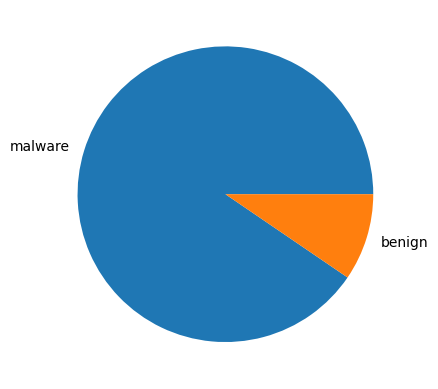

In [4]:
# Our pie chart  
import matplotlib.pyplot as plt

labels = 'malware', 'benign'

fig, ax = plt.subplots()
ax.pie(data['label'].value_counts(), labels = labels)

In [5]:
# splitting the data unbalnced 
from sklearn.model_selection import train_test_split

# our unbalanced training data, random stat just makes us get the same random numbers each time??
ub_train, ub_test = train_test_split(data, test_size=0.33, random_state=42)

# just wanted to see that it was split 
print(ub_train.shape)
print(ub_test.shape)

# and how it split
# ub_train.head()
# ub_test.head()
print(ub_train['label'].value_counts())
print(ub_test['label'].value_counts())


(4186, 1085)
(2062, 1085)
1    3806
0     380
Name: label, dtype: int64
1    1847
0     215
Name: label, dtype: int64


In [6]:
# making our tree model 
from sklearn import tree

# splitting the classifier from the rest of the data 
Y = ub_train['label']
X = ub_train.drop(['label'], axis=1)

# make our decision tree 
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X,Y)

<Figure size 2000x2000 with 0 Axes>

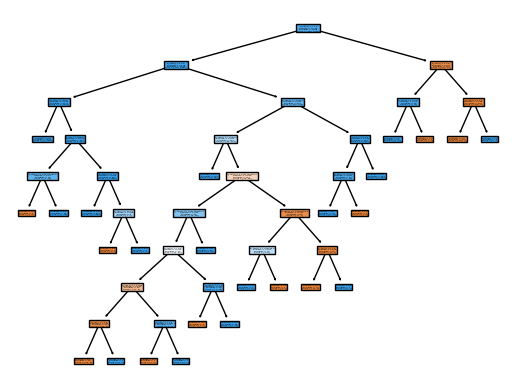

<Figure size 2000x2000 with 0 Axes>

In [7]:
# plot our decision tree not sure how to make it bigger 
tree.plot_tree(clf, filled=True)
plt.figure(figsize=(20,20))

In [8]:
# so it probably overfit the model 
clf.score(X, Y)

1.0

In [9]:
# these scores seem really high too high but I don't see what I did wrong... I wish I could test it.. I mean I couuld 
# try changing all the 1 to 0 and vice versa 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# trying to test... https://scikit-learn.org/stable/modules/tree.html
Y_test = ub_test['label']
X_test = ub_test.drop(['label'], axis=1)

# what it predicted 
predictions = clf.predict(X_test)

# print(predictions)
# print(Y_test)

# accuracy 
print("Accuracy:",metrics.accuracy_score(Y_test, predictions))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
# print("AUC:",metrics.auc(Y_test, predictions))
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#examples-using-sklearn-metrics-precision-score
print("Precision:",metrics.precision_score(Y_test, predictions, average='macro'))
print("Recall:",metrics.recall_score(Y_test, predictions, average='macro'))

Accuracy: 0.9951503394762367
Precision: 0.9870185467319726
Recall: 0.9870185467319726


In [10]:
# seems like it is doing way to well  and I am not really sure how to test it 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# trying to test... https://scikit-learn.org/stable/modules/tree.html
Y_test = ub_test['label']
X_test = ub_test.drop(['label'], axis=1)

predictions = clf.predict(X_test)

# print(predictions)
# print(Y_test)

print("Accuracy:",metrics.accuracy_score(Y_test, predictions))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)
print("ACU:", metrics.auc(fpr, tpr))
print("F1:", metrics.f1_score(Y_test, predictions))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
# print("AUC:",metrics.auc(Y_test, predictions))
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#examples-using-sklearn-metrics-precision-score
print("Precision:",metrics.precision_score(Y_test, predictions))
print("Recall:",metrics.recall_score(Y_test, predictions))

Accuracy: 0.9951503394762367
ACU: 0.9870185467319726
F1: 0.9972929074174337
Precision: 0.9972929074174337
Recall: 0.9972929074174337


In [11]:
# from imblearn.over_sampling import RandomOverSampler

# y = data[data['label'] == 1]
# X = data[data['label'] == 0]

# y.shape

# ros = RandomOverSampler(random_state=42)
# X_res, y_res = ros.fit_resample(data, ['label'])

# # X_res.head()


In [12]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print(X[1])
print(len(y))
print('Original dataset shape %s' % Counter(y))
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print(X_res[1])
print(len(y_res))
print('Resampled dataset shape %s' % Counter(y_res))

[ 0.25364115 -1.45638734 -0.52259796 -1.20056961 -0.59555287  3.49859326
  0.44735439  0.75267869 -0.43342196  1.55254289  2.16911346 -0.75324323
  0.6556247   0.61242855 -1.19028557  0.19773809  1.0019116   1.69409346
 -0.24969905  0.4587598 ]
1000
Original dataset shape Counter({1: 900, 0: 100})
[ 0.25364115 -1.45638734 -0.52259796 -1.20056961 -0.59555287  3.49859326
  0.44735439  0.75267869 -0.43342196  1.55254289  2.16911346 -0.75324323
  0.6556247   0.61242855 -1.19028557  0.19773809  1.0019116   1.69409346
 -0.24969905  0.4587598 ]
1800
Resampled dataset shape Counter({0: 900, 1: 900})
